In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
binance_df = pd.read_csv('data/binanceRealizedFundings.csv')
bybit_df = pd.read_csv('data/bybitRealizedFundings.csv')
next_funding_rate = pd.read_csv('data/nextFundingRates.csv')

In [10]:
next_funding_rate['timestamp'] = pd.to_datetime(next_funding_rate['timestamp'], unit='ms')
symbols = next_funding_rate['symbol'].unique()
symbols

array(['1000LUNCUSDT', '1000XECUSDT', '1INCHUSDT', 'AAVEUSDT', 'ACHUSDT',
       'ADAUSDT', 'ALGOUSDT', 'ALICEUSDT', 'ALPHAUSDT', 'ANKRUSDT',
       'ANTUSDT', 'APEUSDT', 'API3USDT', 'APTUSDT', 'ARPAUSDT', 'ARUSDT',
       'ASTRUSDT', 'ATOMUSDT', 'AUDIOUSDT', 'AVAXUSDT', 'AXSUSDT',
       'BAKEUSDT', 'BALUSDT', 'BANDUSDT', 'BATUSDT', 'BCHUSDT', 'BELUSDT',
       'BLZUSDT', 'BNBUSDT', 'BNXUSDT', 'BTCUSDT', 'C98USDT', 'CELOUSDT',
       'CELRUSDT', 'CHRUSDT', 'CHZUSDT', 'CKBUSDT', 'COMPUSDT',
       'COTIUSDT', 'CRVUSDT', 'CTKUSDT', 'CTSIUSDT', 'CVXUSDT', 'DARUSDT',
       'DASHUSDT', 'DENTUSDT', 'DGBUSDT', 'DOGEUSDT', 'DOTUSDT',
       'DUSKUSDT', 'DYDXUSDT', 'EGLDUSDT', 'ENJUSDT', 'ENSUSDT',
       'EOSUSDT', 'ETCUSDT', 'ETHUSDT', 'FILUSDT', 'FLMUSDT', 'FLOWUSDT',
       'FTMUSDT', 'FXSUSDT', 'GALAUSDT', 'GALUSDT', 'GMTUSDT', 'GMXUSDT',
       'GRTUSDT', 'GTCUSDT', 'HBARUSDT', 'HNTUSDT', 'HOTUSDT', 'ICPUSDT',
       'ICXUSDT', 'IMXUSDT', 'INJUSDT', 'IOSTUSDT', 'IOTAUSDT',
       'IOTXU

In [4]:


entries_for_one_symbol = next_funding_rate.loc[(next_funding_rate['symbol'] == 'BTCUSDT') & (next_funding_rate['exchange'] == 'BYBITU')].copy()
entries_for_one_symbol['times_gaps'] = entries_for_one_symbol['timestamp'] - entries_for_one_symbol['timestamp'].shift(1)


In [5]:
entries_for_one_symbol['times_gaps'] = entries_for_one_symbol['times_gaps'].apply(lambda x: x.total_seconds())
entries_for_one_symbol['times_gaps']

30               NaN
15001       9044.181
15140         60.001
15193         60.000
15308         59.999
              ...   
12461830    1020.000
12462145     540.001
12462857    1079.999
12462919     120.001
12463060     179.999
Name: times_gaps, Length: 37869, dtype: float64

<Axes: >

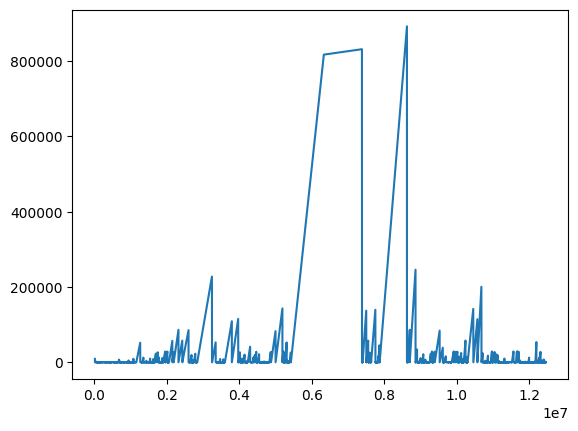

In [6]:
entries_for_one_symbol['times_gaps'].plot()

In [7]:
symbol = 'BTCUSDT'

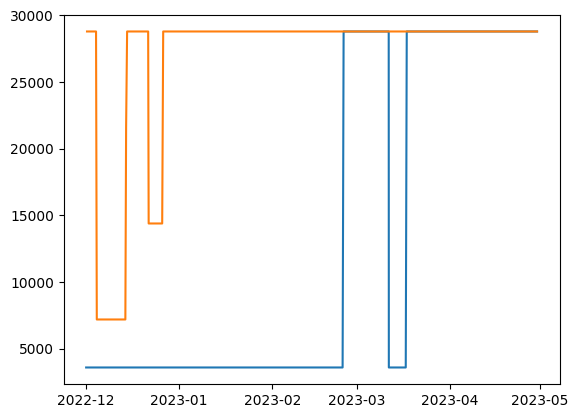

In [8]:
bybit_btc_df = bybit_df[['timestamp', symbol + '_realizedFunding']].copy()
bybit_btc_df['timestamp'] = pd.to_datetime(bybit_btc_df['timestamp'])
bybit_btc_df['times_gaps'] = bybit_btc_df['timestamp'] - bybit_btc_df['timestamp'].shift(1)
bybit_btc_df['times_gaps'] = bybit_btc_df['times_gaps'].apply(lambda x: x.total_seconds())
bybit_gaps = bybit_btc_df['times_gaps'].tolist()

binance_one_symbol_df = binance_df[['timestamp', symbol + '_realizedFunding']].copy()
binance_one_symbol_df['timestamp'] = pd.to_datetime(binance_one_symbol_df['timestamp'])
binance_one_symbol_df['times_gaps'] = binance_one_symbol_df['timestamp'] - binance_one_symbol_df['timestamp'].shift(1)
binance_one_symbol_df['times_gaps'] = binance_one_symbol_df['times_gaps'].apply(lambda x: x.total_seconds())
binance_gaps = binance_one_symbol_df['times_gaps'].tolist()

plt.plot(bybit_btc_df['timestamp'], bybit_gaps)
plt.plot(binance_one_symbol_df['timestamp'], binance_gaps)
plt.show()